<a href="https://colab.research.google.com/github/Deekshit1325/Email-spam-classification/blob/main/Email_Spam_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*`Project Title:`*

**Email Spam Detection using Machine Learning**

*`Problem Statement`*

Email spam poses a significant challenge in communication systems. The objective of this project is to build a machine learning model that automatically classifies emails as spam or ham (non-spam).

*`Dataset Used`*

Dataset Name: Emails Spam Dataset

Source: Kaggle Dataset

Columns:

text – email content

spam – label (1 = spam, 0 = ham)

*`Algorithms Used`*

Naive Bayes

Logistic Regression

*`Why These Algorithms?`*
**Naive Bayes**

Works well with text data

Fast and simple

Based on word probability distribution

**Logistic Regression**

Performs well on high-dimensional TF-IDF features

Provides better decision boundaries

Interpretable and widely used in industry

Logistic Regression achieved higher accuracy and F1-score compared to Naive Bayes.

*`Techniques Used`*

TF-IDF Vectorization

Train-Test Split

Confusion Matrix

Precision, Recall, F1-Score

Feature Importance Visualization

*`Results Summary`*

**Naive Bayes Accuracy: 89%**

**Logistic Regression Accuracy: 97%**

Logistic Regression showed better precision and recall for spam detection.

*`Conclusion`*

In this project, an email spam classification system was developed using machine learning techniques. TF-IDF was used for text vectorization, and two models—Naive Bayes and Logistic Regression—were trained and evaluated. Logistic Regression outperformed Naive Bayes with higher accuracy and F1-score, making it the preferred model for deployment. The project demonstrates effective text preprocessing, model evaluation, and result interpretation.

**1. Dataset Extraction and Loading**

Purpose:
Extract the dataset from ZIP file and load it into a Pandas DataFrame for analysis.

In [3]:
import zipfile
with zipfile.ZipFile("emails.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

**2. Dataset Inspection**

Purpose:
Understand dataset structure, column names, and sample email texts.

In [5]:
import pandas as pd
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**3. Feature and Target Selection**

(X = df["text"], y = df["spam"])

Purpose:
Separate input features (email text) and target labels (spam/ham).

In [6]:
df.columns

Index(['text', 'spam'], dtype='object')

**4. Train–Test Split**

Purpose:
Split data into training and testing sets to evaluate model performance on unseen data.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df["text"]
y = df["spam"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Text Vectorization using TF-IDF:
Convert raw email text into numerical features using TF-IDF representation.

**6. Model 1: Naive Bayes Training and Evaluation**

Purpose:
Train a Naive Bayes classifier and evaluate its accuracy on test data.

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

nb_pred = nb_model.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naive Bayes Accuracy: 0.8926701570680629


**7. Model 2: Logistic Regression Training and Evaluation**

Purpose:
Train a Logistic Regression model and compare its performance with Naive Bayes.

In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

lr_pred = lr_model.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))


Logistic Regression Accuracy: 0.9764397905759162


**8. Model Accuracy Comparison**

Purpose:
Visually compare accuracy of Naive Bayes and Logistic Regression models.

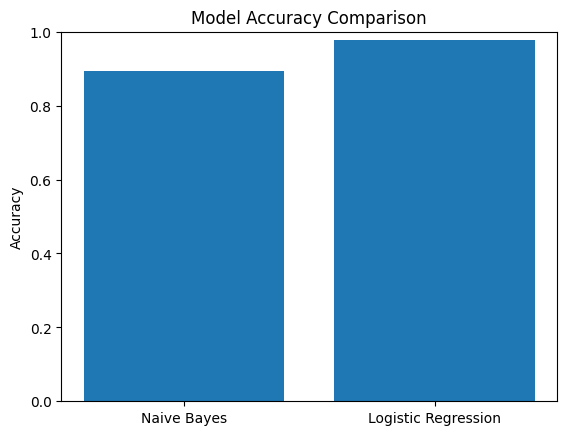

In [10]:
import matplotlib.pyplot as plt

plt.bar(
    ["Naive Bayes", "Logistic Regression"],
    [
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, lr_pred)
    ]
)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


**9. Confusion Matrix Visualization**

Purpose:
Analyze classification errors and correct predictions for spam and ham emails.

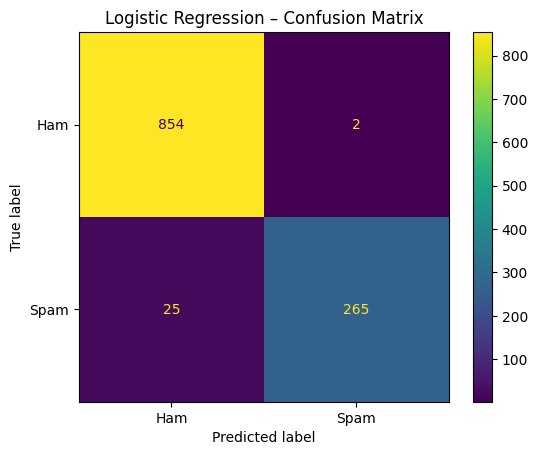

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot()
plt.title("Logistic Regression – Confusion Matrix")
plt.show()


**10. Classification Report (Precision, Recall, F1-Score)**

Purpose:
Evaluate model performance using precision, recall, and F1-score metrics.

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       0.99      0.91      0.95       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



**11. Feature Importance Analysis**

Purpose:
Identify important words contributing to spam and ham classification.

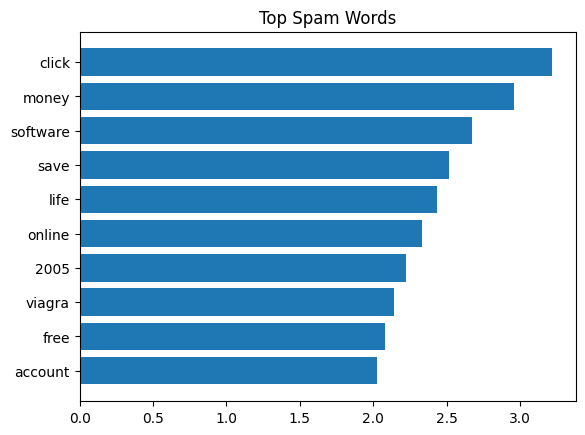

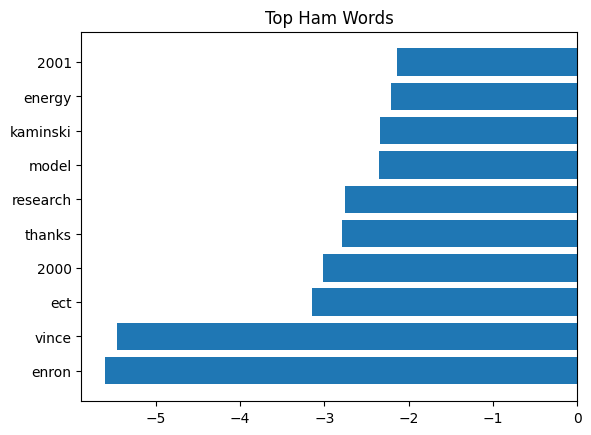

In [11]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coeff = lr_model.coef_[0]

top_spam = np.argsort(coeff)[-10:]
top_ham = np.argsort(coeff)[:10]

plt.figure()
plt.barh(feature_names[top_spam], coeff[top_spam])
plt.title("Top Spam Words")
plt.show()

plt.figure()
plt.barh(feature_names[top_ham], coeff[top_ham])
plt.title("Top Ham Words")
plt.show()
